# Übung 3 (Prof hat nichts vorbereitet)

In [1]:
import sklearn as sns
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

In [2]:
x,y = datasets.load_iris(as_frame=True, return_X_y=True)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
igris = datasets.load_iris()
x = igris.data
y = igris.target

target_names = igris.target_names

x_names = [target_names[i] for i in y]

df = pd.DataFrame(x, columns=igris.feature_names)
df["target"] = x_names

df["is_virginica"] = np.where(df["target"] == "virginica", 1, 0)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is_virginica
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
clf = LogisticRegression() 
clf.fit(X=df[["sepal length (cm)"]] , y=df["is_virginica"])

LogisticRegression()

In [5]:
clf.predict_proba(X=[[5.0], [6.0], [7.0], [8.0]])

c:\Users\thiel\miniconda3\envs\data_science\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.95033203, 0.04966797],
       [0.67296575, 0.32703425],
       [0.18120688, 0.81879312],
       [0.023248  , 0.976752  ]])

c:\Users\thiel\miniconda3\envs\data_science\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


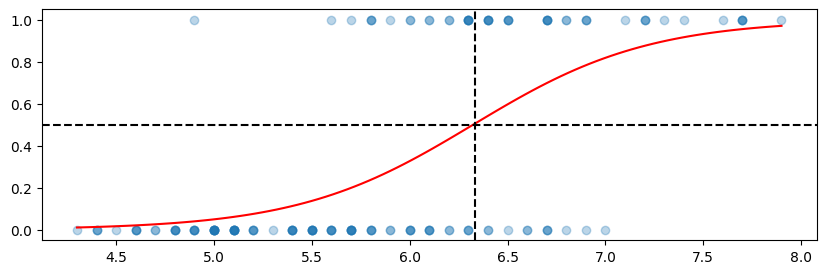

In [6]:
fig = plt.figure(figsize=(10, 3))
plt.scatter(df["sepal length (cm)"], df["is_virginica"], alpha=0.3)

# plot the logistic regression
x_values = np.linspace(df["sepal length (cm)"].min(), df["sepal length (cm)"].max(), 100)
y_values = clf.predict_proba(x_values.reshape(-1, 1))[:,1]
plt.plot(x_values, y_values, color="red")

# plot horizontal line at 0.5
plt.axhline(0.5, color="black", linestyle="--")
#plot vertical line at intersection with logistic regression
plt.axvline(x_values[np.argmax(y_values > 0.5)], color="black", linestyle="--")
